In [1]:
import matplotlib as mpl
mpl.rcParams['axes.formatter.limits'] = (-1,4)

In [5]:
datTree = Tree(JetHT_Data_UL, signal=False)
MCTree = Tree(QCD_B_List + [TTJets], signal=False)
QCDTree = Tree(QCD_B_List, signal=False)
TTTree = Tree(TTJets, signal=False)

In [6]:
TTTree.scale

0.14594586910332114

In [ ]:
TTTree.

In [7]:
sigTree = Tree(NMSSM_MX_700_MY_400)

In [8]:
cut_6jNN = 0

# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [86]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

In [10]:
### SIGNAL ###
sig_Dm_cand = abs(sigTree.t6_higgs_m - 125)

# mass veto
sig_SR = ak.all(sig_Dm_cand <= SR_edge, axis=1) # SR
sig_VR = ak.all(sig_Dm_cand > SR_edge, axis=1) & ak.all(sig_Dm_cand <= VR_edge, axis=1) # VR
sig_CR = ak.all(sig_Dm_cand > VR_edge, axis=1) # CR

In [11]:
from utils.analysis import get_scaled_weights

In [12]:
mH_bins = np.linspace(0,500,101)

In [13]:
N_m1 = np.zeros_like(mH_bins[:-1])
N_m2 = np.zeros_like(mH_bins[:-1])
N_m3 = np.zeros_like(mH_bins[:-1])

N_m1_CR = np.zeros_like(mH_bins[:-1])
N_m1_VR = np.zeros_like(mH_bins[:-1])
N_m1_SR = np.zeros_like(mH_bins[:-1])
N_m2_CR = np.zeros_like(mH_bins[:-1])
N_m2_VR = np.zeros_like(mH_bins[:-1])
N_m2_SR = np.zeros_like(mH_bins[:-1])
N_m3_CR = np.zeros_like(mH_bins[:-1])
N_m3_VR = np.zeros_like(mH_bins[:-1])
N_m3_SR = np.zeros_like(mH_bins[:-1])

for arr,scale in zip(MCTree.t6_higgs_m,MCTree.scale):
    m1 = arr[:,0].to_numpy()
    m2 = arr[:,1].to_numpy()
    m3 = arr[:,2].to_numpy()

    n,e = np.histogram(m1, bins=mH_bins)
    N_m1 += n*scale
    n,e = np.histogram(m2, bins=mH_bins)
    N_m2 += n*scale
    n,e = np.histogram(m3, bins=mH_bins)
    N_m3 += n*scale

    SR_mask = ak.all(abs(arr - mH) <= SR_edge, axis=1) # SR
    VR_mask = ak.all(abs(arr - mH) > SR_edge, axis=1) & ak.all(abs(arr - mH) <= VR_edge, axis=1) # VR
    CR_mask = ak.all(abs(arr - mH) > VR_edge, axis=1) # CR
    
    n,e = np.histogram(m1[SR_mask], bins=mH_bins)
    N_m1_SR += n*scale
    n,e = np.histogram(m1[VR_mask], bins=mH_bins)
    N_m1_VR += n*scale
    n,e = np.histogram(m1[CR_mask], bins=mH_bins)
    N_m1_CR += n*scale

    n,e = np.histogram(m2[SR_mask], bins=mH_bins)
    N_m2_SR += n*scale
    n,e = np.histogram(m2[VR_mask], bins=mH_bins)
    N_m2_VR += n*scale
    n,e = np.histogram(m2[CR_mask], bins=mH_bins)
    N_m2_CR += n*scale

    n,e = np.histogram(m3[SR_mask], bins=mH_bins)
    N_m3_SR += n*scale
    n,e = np.histogram(m3[VR_mask], bins=mH_bins)
    N_m3_VR += n*scale
    n,e = np.histogram(m3[CR_mask], bins=mH_bins)
    N_m3_CR += n*scale

In [93]:
import vector

In [101]:
N_m1 = np.zeros_like(mH_bins[:-1])
N_m2 = np.zeros_like(mH_bins[:-1])
N_m3 = np.zeros_like(mH_bins[:-1])

N_m1_CR = np.zeros_like(mH_bins[:-1])
N_m1_VR = np.zeros_like(mH_bins[:-1])
N_m1_SR = np.zeros_like(mH_bins[:-1])
N_m2_CR = np.zeros_like(mH_bins[:-1])
N_m2_VR = np.zeros_like(mH_bins[:-1])
N_m2_SR = np.zeros_like(mH_bins[:-1])
N_m3_CR = np.zeros_like(mH_bins[:-1])
N_m3_VR = np.zeros_like(mH_bins[:-1])
N_m3_SR = np.zeros_like(mH_bins[:-1])

N_m1_CR_ls = np.zeros_like(mH_bins[:-1])
N_m1_CR_hs = np.zeros_like(mH_bins[:-1])
N_m1_VR_ls = np.zeros_like(mH_bins[:-1])
N_m1_VR_hs = np.zeros_like(mH_bins[:-1])
N_m1_SR_ls = np.zeros_like(mH_bins[:-1])
N_m1_SR_hs = np.zeros_like(mH_bins[:-1])
N_m2_CR_ls = np.zeros_like(mH_bins[:-1])
N_m2_CR_hs = np.zeros_like(mH_bins[:-1])
N_m2_VR_ls = np.zeros_like(mH_bins[:-1])
N_m2_VR_hs = np.zeros_like(mH_bins[:-1])
N_m2_SR_ls = np.zeros_like(mH_bins[:-1])
N_m2_SR_hs = np.zeros_like(mH_bins[:-1])
N_m3_CR_ls = np.zeros_like(mH_bins[:-1])
N_m3_CR_hs = np.zeros_like(mH_bins[:-1])
N_m3_VR_ls = np.zeros_like(mH_bins[:-1])
N_m3_VR_hs = np.zeros_like(mH_bins[:-1])
N_m3_SR_ls = np.zeros_like(mH_bins[:-1])
N_m3_SR_hs = np.zeros_like(mH_bins[:-1])

mX_bins = np.linspace(0,2000,100)

N_X_SR_ls = np.zeros_like(mX_bins[:-1])
N_X_SR_hs = np.zeros_like(mX_bins[:-1])
N_X_VR_ls = np.zeros_like(mX_bins[:-1])
N_X_VR_hs = np.zeros_like(mX_bins[:-1])
N_X_CR_ls = np.zeros_like(mX_bins[:-1])
N_X_CR_hs = np.zeros_like(mX_bins[:-1])

for pt,eta,phi,m,scale,btagsum in zip(MCTree.t6_higgs_pt,MCTree.t6_higgs_eta,MCTree.t6_higgs_phi,MCTree.t6_higgs_m,MCTree.scale,MCTree.t6_jet_btagsum):
    m1 = m[:,0].to_numpy()
    m2 = m[:,1].to_numpy()
    m3 = m[:,2].to_numpy()

    pt1 = pt[:,0].to_numpy()
    pt2 = pt[:,1].to_numpy()
    pt3 = pt[:,2].to_numpy()

    eta1 = eta[:,0].to_numpy()
    eta2 = eta[:,1].to_numpy()
    eta3 = eta[:,2].to_numpy()

    phi1 = phi[:,0].to_numpy()
    phi2 = phi[:,1].to_numpy()
    phi3 = phi[:,2].to_numpy()

    n,e = np.histogram(m1, bins=mH_bins)
    N_m1 += n*scale
    n,e = np.histogram(m2, bins=mH_bins)
    N_m2 += n*scale
    n,e = np.histogram(m3, bins=mH_bins)
    N_m3 += n*scale

    SR_mask = ak.all(abs(m - mH) <= SR_edge, axis=1) # SR
    VR_mask = ak.all(abs(m - mH) > SR_edge, axis=1) & ak.all(abs(m - mH) <= VR_edge, axis=1) # VR
    CR_mask = ak.all(abs(m - mH) > VR_edge, axis=1) # CR

    # No high or low score regions yet
    # Just SR, VR, and CR

    n,e = np.histogram(m1[SR_mask], bins=mH_bins)
    N_m1_SR += n*scale
    n,e = np.histogram(m1[VR_mask], bins=mH_bins)
    N_m1_VR += n*scale
    n,e = np.histogram(m1[CR_mask], bins=mH_bins)
    N_m1_CR += n*scale

    n,e = np.histogram(m2[SR_mask], bins=mH_bins)
    N_m2_SR += n*scale
    n,e = np.histogram(m2[VR_mask], bins=mH_bins)
    N_m2_VR += n*scale
    n,e = np.histogram(m2[CR_mask], bins=mH_bins)
    N_m2_CR += n*scale

    n,e = np.histogram(m3[SR_mask], bins=mH_bins)
    N_m3_SR += n*scale
    n,e = np.histogram(m3[VR_mask], bins=mH_bins)
    N_m3_VR += n*scale
    n,e = np.histogram(m3[CR_mask], bins=mH_bins)
    N_m3_CR += n*scale

    # Division into low and high btag score sum

    hs_mask = btagsum/6 >= 0.65
    ls_mask = btagsum/6 < 0.65

    n,e = np.histogram(m1[SR_mask & hs_mask], bins=mH_bins)
    N_m1_SR_hs += n*scale
    n,e = np.histogram(m1[VR_mask & hs_mask], bins=mH_bins)
    N_m1_VR_hs += n*scale
    n,e = np.histogram(m1[CR_mask & hs_mask], bins=mH_bins)
    N_m1_CR_hs += n*scale

    n,e = np.histogram(m2[SR_mask & hs_mask], bins=mH_bins)
    N_m2_SR_hs += n*scale
    n,e = np.histogram(m2[VR_mask & hs_mask], bins=mH_bins)
    N_m2_VR_hs += n*scale
    n,e = np.histogram(m2[CR_mask & hs_mask], bins=mH_bins)
    N_m2_CR_hs += n*scale

    n,e = np.histogram(m3[SR_mask & hs_mask], bins=mH_bins)
    N_m3_SR_hs += n*scale
    n,e = np.histogram(m3[VR_mask & hs_mask], bins=mH_bins)
    N_m3_VR_hs += n*scale
    n,e = np.histogram(m3[CR_mask & hs_mask], bins=mH_bins)
    N_m3_CR_hs += n*scale

    # SR Higgs P4 Calculations
    H1_SR_hs = vector.obj(pt=pt1[SR_mask & hs_mask], eta=eta1[SR_mask & hs_mask], phi=phi1[SR_mask & hs_mask], m=m1[SR_mask & hs_mask])
    H1_SR_ls = vector.obj(pt=pt1[SR_mask & ls_mask], eta=eta1[SR_mask & ls_mask], phi=phi1[SR_mask & ls_mask], m=m1[SR_mask & ls_mask])
    H2_SR_hs = vector.obj(pt=pt2[SR_mask & hs_mask], eta=eta2[SR_mask & hs_mask], phi=phi2[SR_mask & hs_mask], m=m2[SR_mask & hs_mask])
    H2_SR_ls = vector.obj(pt=pt2[SR_mask & ls_mask], eta=eta2[SR_mask & ls_mask], phi=phi2[SR_mask & ls_mask], m=m2[SR_mask & ls_mask])
    H3_SR_hs = vector.obj(pt=pt3[SR_mask & hs_mask], eta=eta3[SR_mask & hs_mask], phi=phi3[SR_mask & hs_mask], m=m3[SR_mask & hs_mask])
    H3_SR_ls = vector.obj(pt=pt3[SR_mask & ls_mask], eta=eta3[SR_mask & ls_mask], phi=phi3[SR_mask & ls_mask], m=m3[SR_mask & ls_mask])

    # SR X P4 Calculations
    X_SR_ls = H1_SR_ls + H2_SR_ls + H3_SR_ls
    X_SR_hs = H1_SR_hs + H2_SR_hs + H3_SR_hs

    n,e = np.histogram(X_SR_ls.m, bins=mX_bins)
    N_X_SR_ls += n*scale
    n,e = np.histogram(X_SR_hs.m, bins=mX_bins)
    N_X_SR_hs += n*scale

    H1_VR_hs = vector.obj(pt=pt1[VR_mask & hs_mask], eta=eta1[VR_mask & hs_mask], phi=phi1[VR_mask & hs_mask], m=m1[VR_mask & hs_mask])
    H1_VR_ls = vector.obj(pt=pt1[VR_mask & ls_mask], eta=eta1[VR_mask & ls_mask], phi=phi1[VR_mask & ls_mask], m=m1[VR_mask & ls_mask])
    H2_VR_hs = vector.obj(pt=pt2[VR_mask & hs_mask], eta=eta2[VR_mask & hs_mask], phi=phi2[VR_mask & hs_mask], m=m2[VR_mask & hs_mask])
    H2_VR_ls = vector.obj(pt=pt2[VR_mask & ls_mask], eta=eta2[VR_mask & ls_mask], phi=phi2[VR_mask & ls_mask], m=m2[VR_mask & ls_mask])
    H3_VR_hs = vector.obj(pt=pt3[VR_mask & hs_mask], eta=eta3[VR_mask & hs_mask], phi=phi3[VR_mask & hs_mask], m=m3[VR_mask & hs_mask])
    H3_VR_ls = vector.obj(pt=pt3[VR_mask & ls_mask], eta=eta3[VR_mask & ls_mask], phi=phi3[VR_mask & ls_mask], m=m3[VR_mask & ls_mask])

    X_VR_ls = H1_VR_ls + H2_VR_ls + H3_VR_ls
    X_VR_hs = H1_VR_hs + H2_VR_hs + H3_VR_hs

    n,e = np.histogram(X_VR_ls.m, bins=mX_bins)
    N_X_VR_ls += n*scale
    n,e = np.histogram(X_VR_hs.m, bins=mX_bins)
    N_X_VR_hs += n*scale

    H1_CR_hs = vector.obj(pt=pt1[CR_mask & hs_mask], eta=eta1[CR_mask & hs_mask], phi=phi1[CR_mask & hs_mask], m=m1[CR_mask & hs_mask])
    H1_CR_ls = vector.obj(pt=pt1[CR_mask & ls_mask], eta=eta1[CR_mask & ls_mask], phi=phi1[CR_mask & ls_mask], m=m1[CR_mask & ls_mask])
    H2_CR_hs = vector.obj(pt=pt2[CR_mask & hs_mask], eta=eta2[CR_mask & hs_mask], phi=phi2[CR_mask & hs_mask], m=m2[CR_mask & hs_mask])
    H2_CR_ls = vector.obj(pt=pt2[CR_mask & ls_mask], eta=eta2[CR_mask & ls_mask], phi=phi2[CR_mask & ls_mask], m=m2[CR_mask & ls_mask])
    H3_CR_hs = vector.obj(pt=pt3[CR_mask & hs_mask], eta=eta3[CR_mask & hs_mask], phi=phi3[CR_mask & hs_mask], m=m3[CR_mask & hs_mask])
    H3_CR_ls = vector.obj(pt=pt3[CR_mask & ls_mask], eta=eta3[CR_mask & ls_mask], phi=phi3[CR_mask & ls_mask], m=m3[CR_mask & ls_mask])

    X_CR_ls = H1_CR_ls + H2_CR_ls + H3_CR_ls
    X_CR_hs = H1_CR_hs + H2_CR_hs + H3_CR_hs

    n,e = np.histogram(X_CR_ls.m, bins=mX_bins)
    N_X_CR_ls += n*scale
    n,e = np.histogram(X_CR_hs.m, bins=mX_bins)
    N_X_CR_hs += n*scale

    n,e = np.histogram(m1[SR_mask & ls_mask], bins=mH_bins)
    N_m1_SR_ls += n*scale
    n,e = np.histogram(m1[VR_mask & ls_mask], bins=mH_bins)
    N_m1_VR_ls += n*scale
    n,e = np.histogram(m1[CR_mask & ls_mask], bins=mH_bins)
    N_m1_CR_ls += n*scale

    n,e = np.histogram(m2[SR_mask & ls_mask], bins=mH_bins)
    N_m2_SR_ls += n*scale
    n,e = np.histogram(m2[VR_mask & ls_mask], bins=mH_bins)
    N_m2_VR_ls += n*scale
    n,e = np.histogram(m2[CR_mask & ls_mask], bins=mH_bins)
    N_m2_CR_ls += n*scale

    n,e = np.histogram(m3[SR_mask & ls_mask], bins=mH_bins)
    N_m3_SR_ls += n*scale
    n,e = np.histogram(m3[VR_mask & ls_mask], bins=mH_bins)
    N_m3_VR_ls += n*scale
    n,e = np.histogram(m3[CR_mask & ls_mask], bins=mH_bins)
    N_m3_CR_ls += n*scale

In [105]:
N_X_CR_hs

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.45945869e-01, 7.82835580e+00, 5.83783476e-01, 1.02162108e+00,
       1.89729630e+00, 3.50270086e+00, 2.52403161e+01, 4.96215955e+00,
       3.35675499e+00, 2.56781537e+01, 1.96243742e+01, 1.14637973e+02,
       4.37222572e+01, 9.17327905e+01, 1.23798018e+01, 2.77297151e+00,
       1.02162108e+00, 2.45105868e+01, 1.00755837e+02, 3.64864673e+00,
       9.43598162e+01, 2.66568999e+01, 3.13271678e+01, 1.11555832e+02,
       4.28312944e+01, 4.21932627e+01, 3.83291560e+02, 6.80972075e+01,
       2.19704547e+02, 2.62107436e+02, 8.56354647e+01, 2.29897151e+02,
       9.90777722e+01, 2.73826413e+02, 1.11531839e+02, 2.58225032e+02,
       9.95801580e+01, 1.44341146e+02, 1.22131176e+02, 1.16474493e+02,
       2.78859556e+02, 2.54328785e+02, 2.63956391e+02, 2.18166709e+02,
      

In [107]:
N_X_CR_hs/N_X_CR_ls

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan, 0.00000000e+00, 0.00000000e+00,
       1.24551247e-03, 4.46989687e+00, 4.71561245e-02, 1.48936170e-01,
       9.64215638e-02, 2.16216216e-01, 4.03723983e-01, 2.15189873e-01,
       2.42060382e-02, 7.47930131e-02, 6.76291397e-01, 2.22662965e+00,
       1.86227280e-01, 2.70166307e+00, 1.15546452e-01, 2.11508881e-02,
       1.05663851e-02, 2.83261325e-01, 7.04385175e-01, 8.84227572e-03,
       6.87526296e-01, 8.68176733e-02, 9.09799546e-02, 3.34910309e-01,
       7.73219217e-02, 5.57263709e-02, 7.93267222e-01, 1.02743929e-01,
       2.87693473e-01, 2.10760838e-01, 1.18684825e-01, 2.58442402e-01,
       8.04148311e-02, 1.98946690e-01, 1.23804136e-01, 3.01137889e-01,
       1.37231337e-01, 1.18392503e-01, 1.46490086e-01, 2.18162961e-01,
       3.42213485e-01, 3.52617053e-01, 3.11467333e-01, 2.81756850e-01,
      

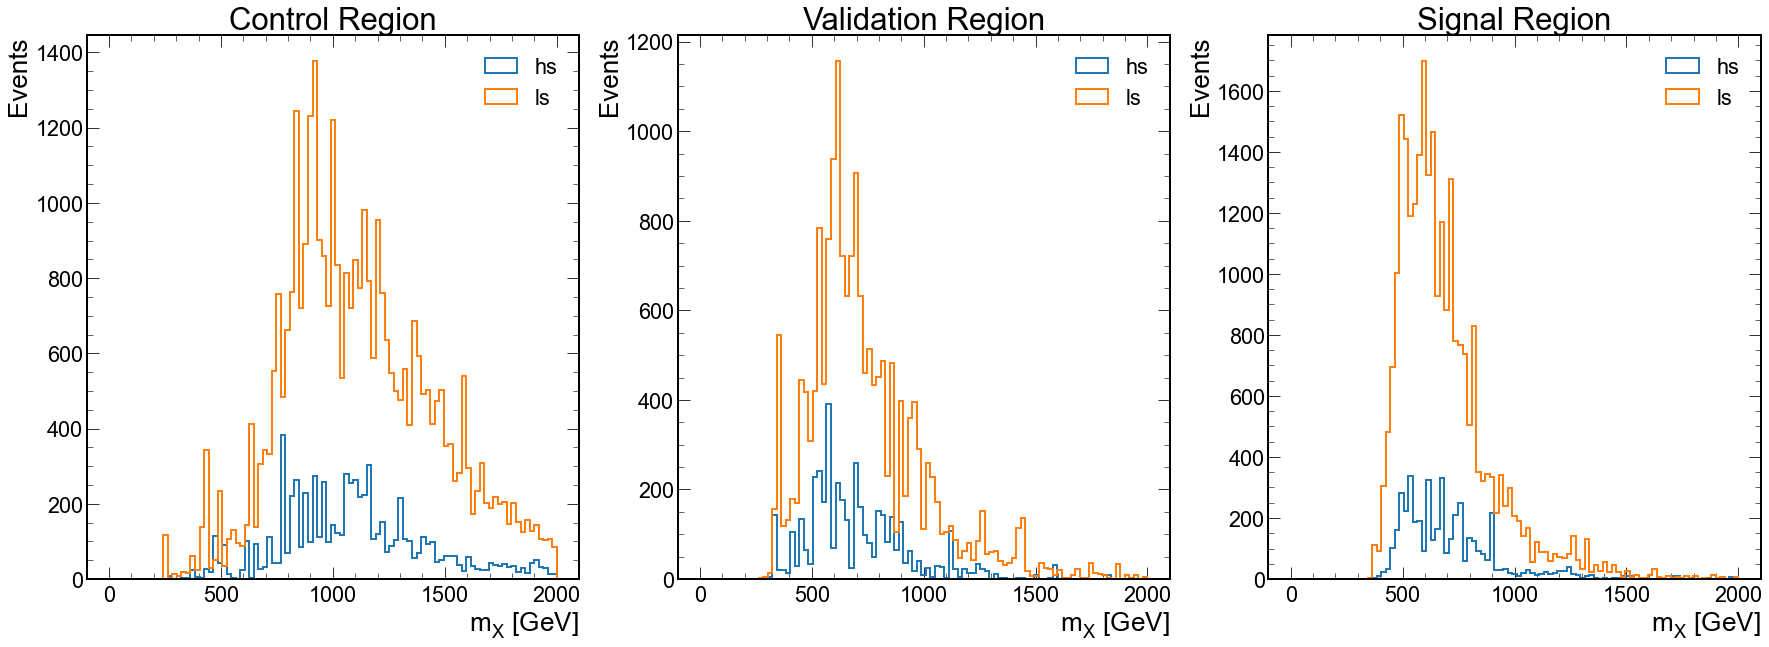

In [138]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10))

ax = axs[0]
n,e = Hist(x_bins(mX_bins), weights=N_X_CR_hs, bins=mX_bins, ax=ax, label='hs')
n,e = Hist(x_bins(mX_bins), weights=N_X_CR_ls, bins=mX_bins, ax=ax, label='ls')
ax.set_title('Control Region')

ax = axs[1]
n,e = Hist(x_bins(mX_bins), weights=N_X_VR_hs, bins=mX_bins, ax=ax, label='hs')
n,e = Hist(x_bins(mX_bins), weights=N_X_VR_ls, bins=mX_bins, ax=ax, label='ls')
ax.set_title('Validation Region')

ax = axs[2]
n,e = Hist(x_bins(mX_bins), weights=N_X_SR_hs, bins=mX_bins, ax=ax, label='hs')
n,e = Hist(x_bins(mX_bins), weights=N_X_SR_ls, bins=mX_bins, ax=ax, label='ls')
ax.set_title('Signal Region')

for ax in axs:
    ax.set_xlabel(r'$m_X$ [GeV]')
    ax.set_ylabel('Events')

fig.savefig('MC_shapes_ls_hs_separateregions.pdf',bbox_inches='tight')

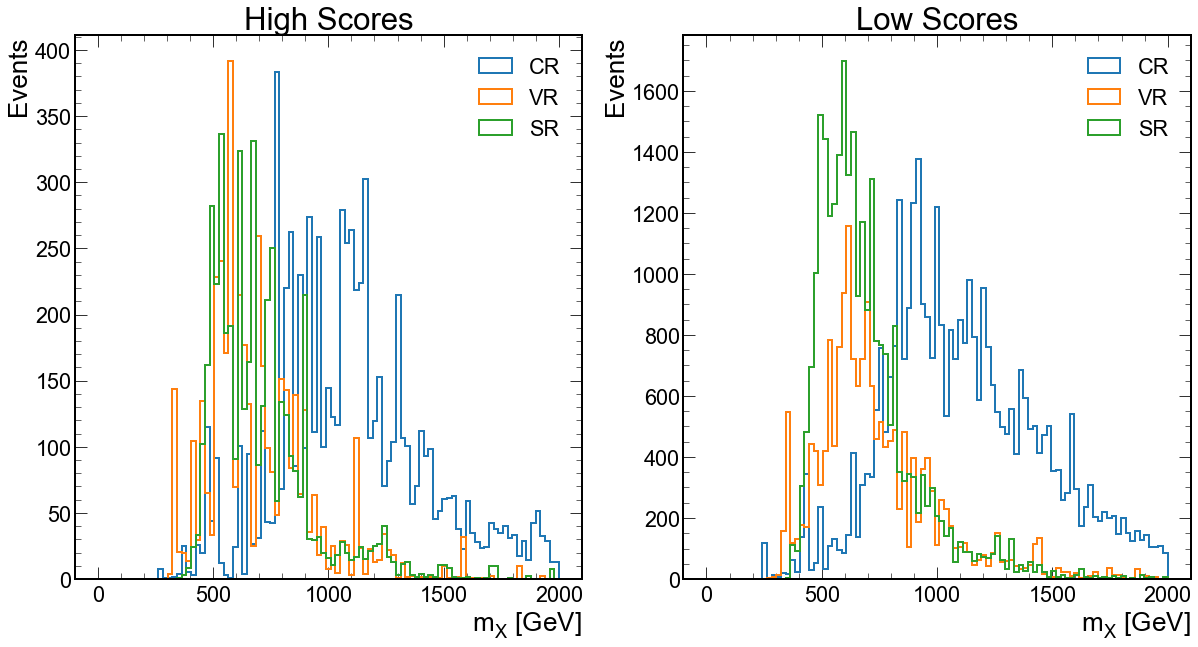

In [137]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax = axs[0]
n,e = Hist(x_bins(mX_bins), weights=N_X_CR_hs, bins=mX_bins, ax=ax, label='CR')
n,e = Hist(x_bins(mX_bins), weights=N_X_VR_hs, bins=mX_bins, ax=ax, label='VR')
n,e = Hist(x_bins(mX_bins), weights=N_X_SR_hs, bins=mX_bins, ax=ax, label='SR')
ax.set_title('High Scores')

ax = axs[1]
n,e = Hist(x_bins(mX_bins), weights=N_X_CR_ls, bins=mX_bins, ax=ax, label='CR')
n,e = Hist(x_bins(mX_bins), weights=N_X_VR_ls, bins=mX_bins, ax=ax, label='VR')
n,e = Hist(x_bins(mX_bins), weights=N_X_SR_ls, bins=mX_bins, ax=ax, label='SR')
ax.set_title('Low Scores')

for ax in axs:
    ax.set_xlabel(r'$m_X$ [GeV]')
    ax.set_ylabel('Events')

fig.savefig('MC_shapes_ls_hs.pdf',bbox_inches='tight')

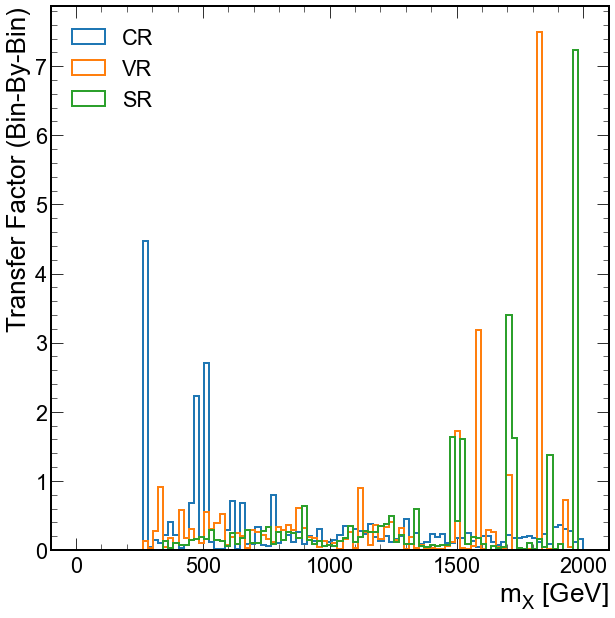

In [139]:
fig, ax = plt.subplots()

TF_CR = ak.nan_to_num(N_X_CR_hs/N_X_CR_ls, 0)
TF_VR = ak.nan_to_num(N_X_VR_hs/N_X_VR_ls, 0)
TF_SR = ak.nan_to_num(N_X_SR_hs/N_X_SR_ls, 0)
# TF_CR = N_X_CR_hs/N_X_CR_ls
# TF_VR = N_X_VR_hs/N_X_VR_ls
# TF_SR = N_X_SR_hs/N_X_SR_ls

# ax.scatter(x_bins(mX_bins), TF_CR, label='CR', marker='_')
# ax.scatter(x_bins(mX_bins), TF_VR, label='VR', marker='_')
# ax.scatter(x_bins(mX_bins), TF_SR, label='SR', marker='_')
n,e = Hist(x_bins(mX_bins), weights=TF_CR, bins=mX_bins, ax=ax, label='CR')
n,e = Hist(x_bins(mX_bins), weights=TF_VR, bins=mX_bins, ax=ax, label='VR')
n,e = Hist(x_bins(mX_bins), weights=TF_SR, bins=mX_bins, ax=ax, label='SR')

ax.legend(loc=2)

ax.set_xlabel(r'$m_X$ [GeV]')
ax.set_ylabel(r'Transfer Factor (Bin-By-Bin)')

fig.savefig('MC_TF_shapes.pdf',bbox_inches='tight')

In [92]:
N_QCD_m1 = np.zeros_like(mH_bins[:-1])
N_QCD_m2 = np.zeros_like(mH_bins[:-1])
N_QCD_m3 = np.zeros_like(mH_bins[:-1])

N_QCD_m1_CR_ls = np.zeros_like(mH_bins[:-1])
N_QCD_m1_CR_hs = np.zeros_like(mH_bins[:-1])
N_QCD_m1_VR_ls = np.zeros_like(mH_bins[:-1])
N_QCD_m1_VR_hs = np.zeros_like(mH_bins[:-1])
N_QCD_m1_SR_ls = np.zeros_like(mH_bins[:-1])
N_QCD_m1_SR_hs = np.zeros_like(mH_bins[:-1])
N_QCD_m2_CR_ls = np.zeros_like(mH_bins[:-1])
N_QCD_m2_CR_hs = np.zeros_like(mH_bins[:-1])
N_QCD_m2_VR_ls = np.zeros_like(mH_bins[:-1])
N_QCD_m2_VR_hs = np.zeros_like(mH_bins[:-1])
N_QCD_m2_SR_ls = np.zeros_like(mH_bins[:-1])
N_QCD_m2_SR_hs = np.zeros_like(mH_bins[:-1])
N_QCD_m3_CR_ls = np.zeros_like(mH_bins[:-1])
N_QCD_m3_CR_hs = np.zeros_like(mH_bins[:-1])
N_QCD_m3_VR_ls = np.zeros_like(mH_bins[:-1])
N_QCD_m3_VR_hs = np.zeros_like(mH_bins[:-1])
N_QCD_m3_SR_ls = np.zeros_like(mH_bins[:-1])
N_QCD_m3_SR_hs = np.zeros_like(mH_bins[:-1])

mX_bins = np.linspace(0,2000,100)

N_QCD_X_SR_ls = np.zeros_like(mX_bins)
N_QCD_X_SR_hs = np.zeros_like(mX_bins)
N_QCD_X_VR_ls = np.zeros_like(mX_bins)
N_QCD_X_VR_hs = np.zeros_like(mX_bins)
N_QCD_X_CR_ls = np.zeros_like(mX_bins)
N_QCD_X_CR_hs = np.zeros_like(mX_bins)

for pt,eta,phi,m,scale,btagsum in zip(QCDTree.t6_higgs_pt,QCDTree.t6_higgs_eta,QCDTree.t6_higgs_phi,QCDTree.t6_higgs_m,QCDTree.scale,QCDTree.t6_jet_btagsum):
    m1 = m[:,0].to_numpy()
    m2 = m[:,1].to_numpy()
    m3 = m[:,2].to_numpy()

    n,e = np.histogram(m1, bins=mH_bins)
    N_QCD_m1 += n*scale
    n,e = np.histogram(m2, bins=mH_bins)
    N_QCD_m2 += n*scale
    n,e = np.histogram(m3, bins=mH_bins)
    N_QCD_m3 += n*scale

    SR_mask = ak.all(abs(m - mH) <= SR_edge, axis=1) # SR
    VR_mask = ak.all(abs(m - mH) > SR_edge, axis=1) & ak.all(abs(m - mH) <= VR_edge, axis=1) # VR
    CR_mask = ak.all(abs(m - mH) > VR_edge, axis=1) # CR
    
    hs_mask = btagsum/6 >= 0.65
    ls_mask = btagsum/6 < 0.65
    
    n,e = np.histogram(m1[SR_mask & hs_mask], bins=mH_bins)
    N_QCD_m1_SR_hs += n*scale
    n,e = np.histogram(m1[VR_mask & hs_mask], bins=mH_bins)
    N_QCD_m1_VR_hs += n*scale
    n,e = np.histogram(m1[CR_mask & hs_mask], bins=mH_bins)
    N_QCD_m1_CR_hs += n*scale

    n,e = np.histogram(m2[SR_mask & hs_mask], bins=mH_bins)
    N_QCD_m2_SR_hs += n*scale
    n,e = np.histogram(m2[VR_mask & hs_mask], bins=mH_bins)
    N_QCD_m2_VR_hs += n*scale
    n,e = np.histogram(m2[CR_mask & hs_mask], bins=mH_bins)
    N_QCD_m2_CR_hs += n*scale

    n,e = np.histogram(m3[SR_mask & hs_mask], bins=mH_bins)
    N_QCD_m3_SR_hs += n*scale
    n,e = np.histogram(m3[VR_mask & hs_mask], bins=mH_bins)
    N_QCD_m3_VR_hs += n*scale
    n,e = np.histogram(m3[CR_mask & hs_mask], bins=mH_bins)
    N_QCD_m3_CR_hs += n*scale

    H1_SR_hs = vector.obj(pt=pt[:,0][SR_mask & hs_mask], eta=eta[:,0][SR_mask & hs_mask], phi=phi[:,0][SR_mask & hs_mask], m=mH[:,0][SR_mask & hs_mask])
    H1_SR_ls = vector.obj(pt=pt[:,0][SR_mask & ls_mask], eta=eta[:,0][SR_mask & ls_mask], phi=phi[:,0][SR_mask & ls_mask], m=mH[:,0][SR_mask & ls_mask])
    H2_SR_hs = vector.obj(pt=pt[:,1][SR_mask & hs_mask], eta=eta[:,1][SR_mask & hs_mask], phi=phi[:,1][SR_mask & hs_mask], m=mH[:,1][SR_mask & hs_mask])
    H2_SR_ls = vector.obj(pt=pt[:,1][SR_mask & ls_mask], eta=eta[:,1][SR_mask & ls_mask], phi=phi[:,1][SR_mask & ls_mask], m=mH[:,1][SR_mask & ls_mask])
    H3_SR_hs = vector.obj(pt=pt[:,2][SR_mask & hs_mask], eta=eta[:,2][SR_mask & hs_mask], phi=phi[:,2][SR_mask & hs_mask], m=mH[:,2][SR_mask & hs_mask])
    H3_SR_ls = vector.obj(pt=pt[:,2][SR_mask & ls_mask], eta=eta[:,2][SR_mask & ls_mask], phi=phi[:,2][SR_mask & ls_mask], m=mH[:,2][SR_mask & ls_mask])

    X_SR_ls = H1_SR_ls + H2_SR_ls + H3_SR_ls
    X_SR_hs = H1_SR_hs + H2_SR_hs + H3_SR_hs

    n,e = np.histogram(X_SR_ls.to_numpy(), bins=mX_bins)
    N_QCD_X_SR_ls += n*scale
    n,e = np.histogram(X_SR_hs.to_numpy(), bins=mX_bins)
    N_QCD_X_SR_hs += n*scale

    H1_VR_hs = vector.obj(pt=pt[:,0][VR_mask & hs_mask], eta=eta[:,0][VR_mask & hs_mask], phi=phi[:,0][VR_mask & hs_mask], m=mH[:,0][VR_mask & hs_mask])
    H1_VR_ls = vector.obj(pt=pt[:,0][VR_mask & ls_mask], eta=eta[:,0][VR_mask & ls_mask], phi=phi[:,0][VR_mask & ls_mask], m=mH[:,0][VR_mask & ls_mask])
    H2_VR_hs = vector.obj(pt=pt[:,1][VR_mask & hs_mask], eta=eta[:,1][VR_mask & hs_mask], phi=phi[:,1][VR_mask & hs_mask], m=mH[:,1][VR_mask & hs_mask])
    H2_VR_ls = vector.obj(pt=pt[:,1][VR_mask & ls_mask], eta=eta[:,1][VR_mask & ls_mask], phi=phi[:,1][VR_mask & ls_mask], m=mH[:,1][VR_mask & ls_mask])
    H3_VR_hs = vector.obj(pt=pt[:,2][VR_mask & hs_mask], eta=eta[:,2][VR_mask & hs_mask], phi=phi[:,2][VR_mask & hs_mask], m=mH[:,2][VR_mask & hs_mask])
    H3_VR_ls = vector.obj(pt=pt[:,2][VR_mask & ls_mask], eta=eta[:,2][VR_mask & ls_mask], phi=phi[:,2][VR_mask & ls_mask], m=mH[:,2][VR_mask & ls_mask])

    X_VR_ls = H1_VR_ls + H2_VR_ls + H3_VR_ls
    X_VR_hs = H1_VR_hs + H2_VR_hs + H3_VR_hs

    n,e = np.histogram(X_VR_ls.to_numpy(), bins=mX_bins)
    N_QCD_X_VR_ls += n*scale
    n,e = np.histogram(X_VR_hs.to_numpy(), bins=mX_bins)
    N_QCD_X_VR_hs += n*scale

    H1_CR_hs = vector.obj(pt=pt[:,0][CR_mask & hs_mask], eta=eta[:,0][CR_mask & hs_mask], phi=phi[:,0][CR_mask & hs_mask], m=mH[:,0][CR_mask & hs_mask])
    H1_CR_ls = vector.obj(pt=pt[:,0][CR_mask & ls_mask], eta=eta[:,0][CR_mask & ls_mask], phi=phi[:,0][CR_mask & ls_mask], m=mH[:,0][CR_mask & ls_mask])
    H2_CR_hs = vector.obj(pt=pt[:,1][CR_mask & hs_mask], eta=eta[:,1][CR_mask & hs_mask], phi=phi[:,1][CR_mask & hs_mask], m=mH[:,1][CR_mask & hs_mask])
    H2_CR_ls = vector.obj(pt=pt[:,1][CR_mask & ls_mask], eta=eta[:,1][CR_mask & ls_mask], phi=phi[:,1][CR_mask & ls_mask], m=mH[:,1][CR_mask & ls_mask])
    H3_CR_hs = vector.obj(pt=pt[:,2][CR_mask & hs_mask], eta=eta[:,2][CR_mask & hs_mask], phi=phi[:,2][CR_mask & hs_mask], m=mH[:,2][CR_mask & hs_mask])
    H3_CR_ls = vector.obj(pt=pt[:,2][CR_mask & ls_mask], eta=eta[:,2][CR_mask & ls_mask], phi=phi[:,2][CR_mask & ls_mask], m=mH[:,2][CR_mask & ls_mask])

    X_CR_ls = H1_CR_ls + H2_CR_ls + H3_CR_ls
    X_CR_hs = H1_CR_hs + H2_CR_hs + H3_CR_hs

    n,e = np.histogram(X_CR_ls.to_numpy(), bins=mX_bins)
    N_QCD_X_CR_ls += n*scale
    n,e = np.histogram(X_CR_hs.to_numpy(), bins=mX_bins)
    N_QCD_X_CR_hs += n*scale

    n,e = np.histogram(m1[SR_mask & ls_mask], bins=mH_bins)
    N_QCD_m1_SR_ls += n*scale
    n,e = np.histogram(m1[VR_mask & ls_mask], bins=mH_bins)
    N_QCD_m1_VR_ls += n*scale
    n,e = np.histogram(m1[CR_mask & ls_mask], bins=mH_bins)
    N_QCD_m1_CR_ls += n*scale

    n,e = np.histogram(m2[SR_mask & ls_mask], bins=mH_bins)
    N_QCD_m2_SR_ls += n*scale
    n,e = np.histogram(m2[VR_mask & ls_mask], bins=mH_bins)
    N_QCD_m2_VR_ls += n*scale
    n,e = np.histogram(m2[CR_mask & ls_mask], bins=mH_bins)
    N_QCD_m2_CR_ls += n*scale

    n,e = np.histogram(m3[SR_mask & ls_mask], bins=mH_bins)
    N_QCD_m3_SR_ls += n*scale
    n,e = np.histogram(m3[VR_mask & ls_mask], bins=mH_bins)
    N_QCD_m3_VR_ls += n*scale
    n,e = np.histogram(m3[CR_mask & ls_mask], bins=mH_bins)
    N_QCD_m3_CR_ls += n*scale

NameError: name 'vector' is not defined

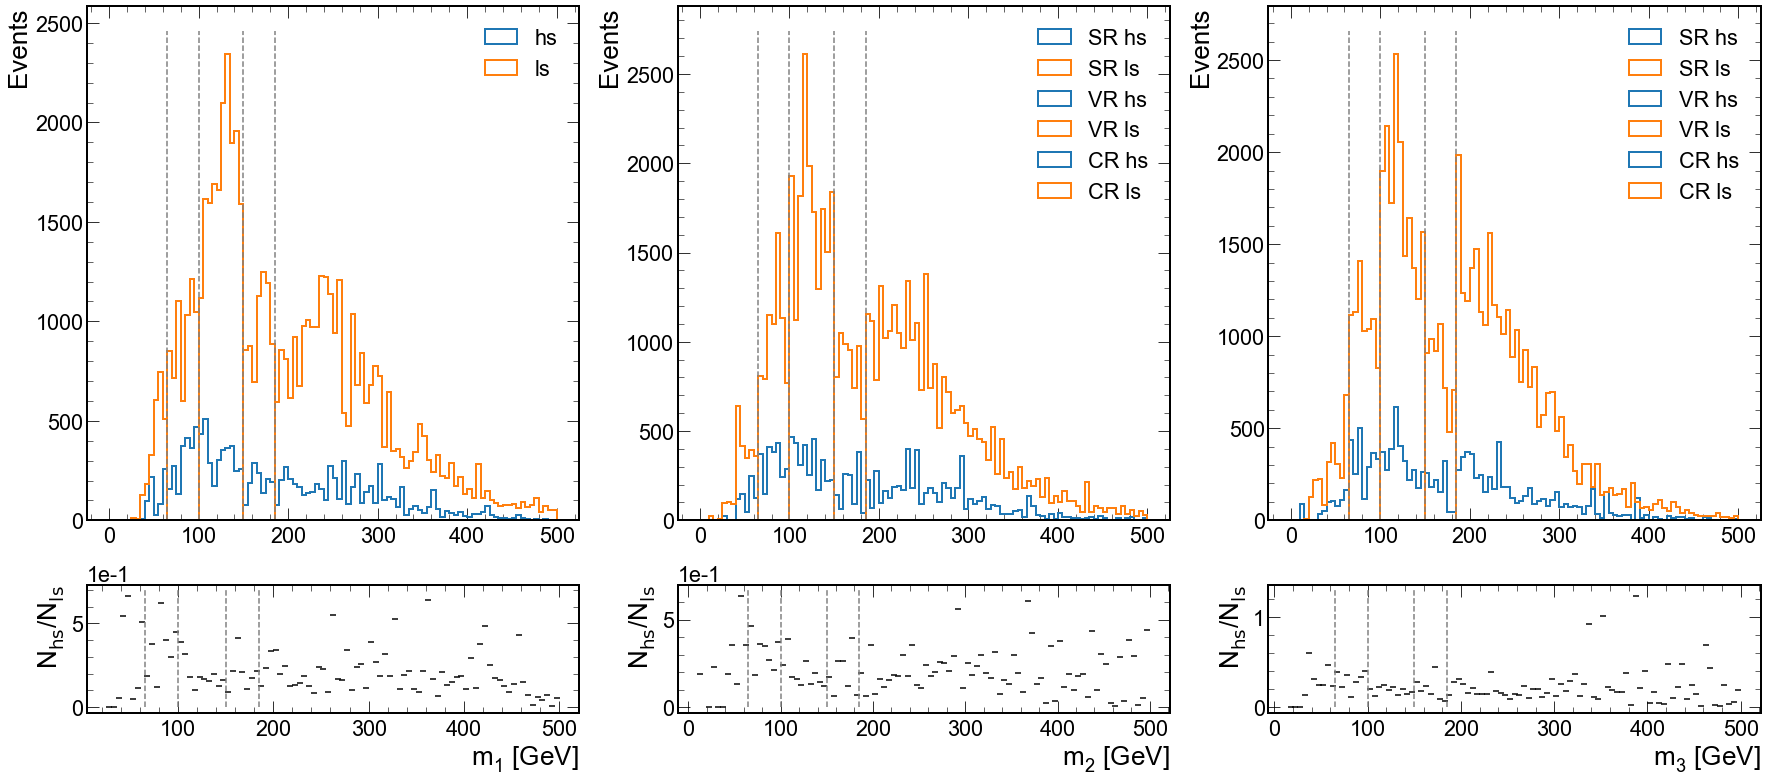

In [84]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,13), gridspec_kw={'height_ratios':[4,1]})

# n,e = Hist(x_bins(mH_bins), weights=ak.nan_to_num(N_QCD_m1_SR_hs/N_QCD_m1_SR_ls,0), bins=mH_bins, ax=ax, label='MC Bkgd', color='black')
ax = axs[0][0]
n_SR_hs,e = Hist(x_bins(mH_bins), weights=N_QCD_m1_SR_hs, bins=mH_bins, ax=ax, label='hs', color='C0')
n_SR_ls,e = Hist(x_bins(mH_bins), weights=N_QCD_m1_SR_ls, bins=mH_bins, ax=ax, label='ls', color='C1')
n_VR_hs,e = Hist(x_bins(mH_bins), weights=N_QCD_m1_VR_hs, bins=mH_bins, ax=ax, color='C0')
n_VR_ls,e = Hist(x_bins(mH_bins), weights=N_QCD_m1_VR_ls, bins=mH_bins, ax=ax, color='C1')
n_CR_hs,e = Hist(x_bins(mH_bins), weights=N_QCD_m1_CR_hs, bins=mH_bins, ax=ax, color='C0')
n_CR_ls,e = Hist(x_bins(mH_bins), weights=N_QCD_m1_CR_ls, bins=mH_bins, ax=ax, color='C1')
ymin, ymax = ax.get_ylim()
ax.plot([SR_lo, SR_lo],[0,ymax],'--',c='gray')
ax.plot([SR_hi, SR_hi],[0,ymax],'--',c='gray')
ax.plot([VR_lo, VR_lo],[0,ymax],'--',c='gray')
ax.plot([VR_hi, VR_hi],[0,ymax],'--',c='gray')
ax.set_ylabel('Events')

ax = axs[1][0]
ax.scatter(x_bins(mH_bins), N_QCD_m1_SR_hs/N_QCD_m1_SR_ls, marker='_', c='k')
ax.scatter(x_bins(mH_bins), N_QCD_m1_VR_hs/N_QCD_m1_VR_ls, marker='_', c='k')
ax.scatter(x_bins(mH_bins), N_QCD_m1_CR_hs/N_QCD_m1_CR_ls, marker='_', c='k')
ymin, ymax = ax.get_ylim()
ax.plot([SR_lo, SR_lo],[0,ymax],'--',c='gray')
ax.plot([SR_hi, SR_hi],[0,ymax],'--',c='gray')
ax.plot([VR_lo, VR_lo],[0,ymax],'--',c='gray')
ax.plot([VR_hi, VR_hi],[0,ymax],'--',c='gray')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')
ax.set_xlabel(r'$m_1$ [GeV]')

ax = axs[0][1]
n_SR_hs,e = Hist(x_bins(mH_bins), weights=N_QCD_m2_SR_hs, bins=mH_bins, ax=ax, label='SR hs', color='C0')
n_SR_ls,e = Hist(x_bins(mH_bins), weights=N_QCD_m2_SR_ls, bins=mH_bins, ax=ax, label='SR ls', color='C1')
n_VR_hs,e = Hist(x_bins(mH_bins), weights=N_QCD_m2_VR_hs, bins=mH_bins, ax=ax, label='VR hs', color='C0')
n_VR_ls,e = Hist(x_bins(mH_bins), weights=N_QCD_m2_VR_ls, bins=mH_bins, ax=ax, label='VR ls', color='C1')
n_CR_hs,e = Hist(x_bins(mH_bins), weights=N_QCD_m2_CR_hs, bins=mH_bins, ax=ax, label='CR hs', color='C0')
n_CR_ls,e = Hist(x_bins(mH_bins), weights=N_QCD_m2_CR_ls, bins=mH_bins, ax=ax, label='CR ls', color='C1')
ymin, ymax = ax.get_ylim()
ax.plot([SR_lo, SR_lo],[0,ymax],'--',c='gray')
ax.plot([SR_hi, SR_hi],[0,ymax],'--',c='gray')
ax.plot([VR_lo, VR_lo],[0,ymax],'--',c='gray')
ax.plot([VR_hi, VR_hi],[0,ymax],'--',c='gray')
ax.set_ylabel('Events')

ax = axs[1][1]
ax.scatter(x_bins(mH_bins), N_QCD_m2_SR_hs/N_QCD_m2_SR_ls, marker='_', c='k')
ax.scatter(x_bins(mH_bins), N_QCD_m2_VR_hs/N_QCD_m2_VR_ls, marker='_', c='k')
ax.scatter(x_bins(mH_bins), N_QCD_m2_CR_hs/N_QCD_m2_CR_ls, marker='_', c='k')
ymin, ymax = ax.get_ylim()
ax.plot([SR_lo, SR_lo],[0,ymax],'--',c='gray')
ax.plot([SR_hi, SR_hi],[0,ymax],'--',c='gray')
ax.plot([VR_lo, VR_lo],[0,ymax],'--',c='gray')
ax.plot([VR_hi, VR_hi],[0,ymax],'--',c='gray')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')
ax.set_xlabel(r'$m_2$ [GeV]')

ax = axs[0][2]
n_SR_hs,e = Hist(x_bins(mH_bins), weights=N_QCD_m3_SR_hs, bins=mH_bins, ax=ax, label='SR hs', color='C0')
n_SR_ls,e = Hist(x_bins(mH_bins), weights=N_QCD_m3_SR_ls, bins=mH_bins, ax=ax, label='SR ls', color='C1')
n_VR_hs,e = Hist(x_bins(mH_bins), weights=N_QCD_m3_VR_hs, bins=mH_bins, ax=ax, label='VR hs', color='C0')
n_VR_ls,e = Hist(x_bins(mH_bins), weights=N_QCD_m3_VR_ls, bins=mH_bins, ax=ax, label='VR ls', color='C1')
n_CR_hs,e = Hist(x_bins(mH_bins), weights=N_QCD_m3_CR_hs, bins=mH_bins, ax=ax, label='CR hs', color='C0')
n_CR_ls,e = Hist(x_bins(mH_bins), weights=N_QCD_m3_CR_ls, bins=mH_bins, ax=ax, label='CR ls', color='C1')
ymin, ymax = ax.get_ylim()
ax.plot([SR_lo, SR_lo],[0,ymax],'--',c='gray')
ax.plot([SR_hi, SR_hi],[0,ymax],'--',c='gray')
ax.plot([VR_lo, VR_lo],[0,ymax],'--',c='gray')
ax.plot([VR_hi, VR_hi],[0,ymax],'--',c='gray')
ax.set_ylabel('Events')

ax = axs[1][2]
ax.scatter(x_bins(mH_bins), N_QCD_m3_SR_hs/N_QCD_m3_SR_ls, marker='_', c='k')
ax.scatter(x_bins(mH_bins), N_QCD_m3_VR_hs/N_QCD_m3_VR_ls, marker='_', c='k')
ax.scatter(x_bins(mH_bins), N_QCD_m3_CR_hs/N_QCD_m3_CR_ls, marker='_', c='k')
ymin, ymax = ax.get_ylim()
ax.plot([SR_lo, SR_lo],[0,ymax],'--',c='gray')
ax.plot([SR_hi, SR_hi],[0,ymax],'--',c='gray')
ax.plot([VR_lo, VR_lo],[0,ymax],'--',c='gray')
ax.plot([VR_hi, VR_hi],[0,ymax],'--',c='gray')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')
ax.set_xlabel(r'$m_3$ [GeV]')

# ax.set_title(sigTree.sample, loc='right')

fig.savefig('MC_shape_analysis.pdf', bbox_inches='tight')

findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


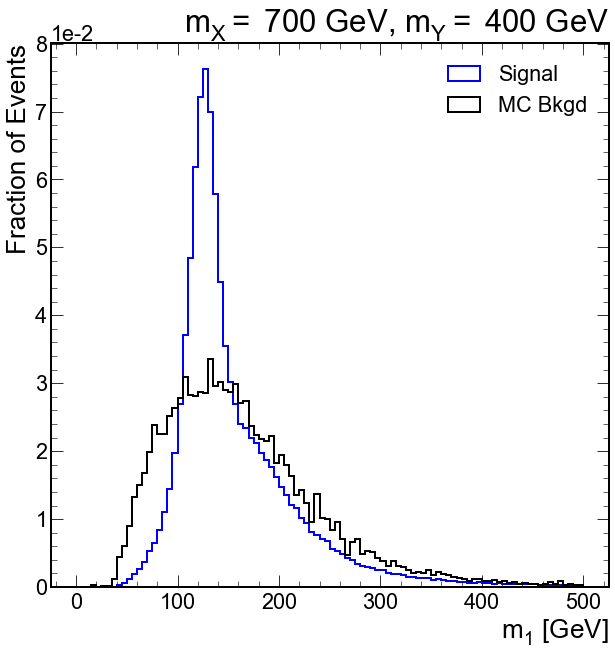

In [14]:
fig, ax = plt.subplots()

n,e = Hist(sigTree.t6_higgs_m[:,0], bins=mH_bins, ax=ax, label='Signal', density=1, color='blue')
n,e = Hist(x_bins(mH_bins), weights=N_m1/N_m1.sum(), bins=mH_bins, ax=ax, label='MC Bkgd', color='black')

ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax.set_title(sigTree.sample, loc='right')

fig.savefig('sig_v_MCbkgd_mH1.pdf')

Text(1.0, 1.0, '$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

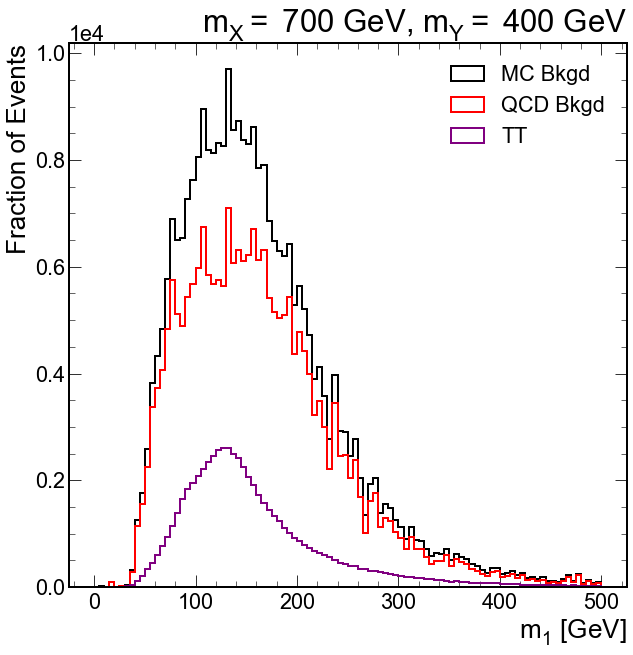

In [15]:
fig, ax = plt.subplots()

# n,e = Hist(sigTree.t6_higgs_m[:,0], bins=mH_bins, ax=ax, label='Signal', density=1, color='blue', scale=sigTree.scale)
n_MC,e = Hist(x_bins(mH_bins), weights=N_m1, bins=mH_bins, ax=ax, label='MC Bkgd', color='black')
n_QCD,e = Hist(x_bins(mH_bins), weights=N_QCD_m1, bins=mH_bins, ax=ax, label='QCD Bkgd', color='red')
n_TT,e = Hist(TTTree.t6_higgs_m[:,0], bins=mH_bins, ax=ax, label='TT', color='purple', scale=TTTree.scale)

assert np.all(n_QCD + n_TT - n_MC < 1e-4)

ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax.set_title(sigTree.sample, loc='right')

# fig.savefig('sig_v_MCbkgd_mH1.pdf')

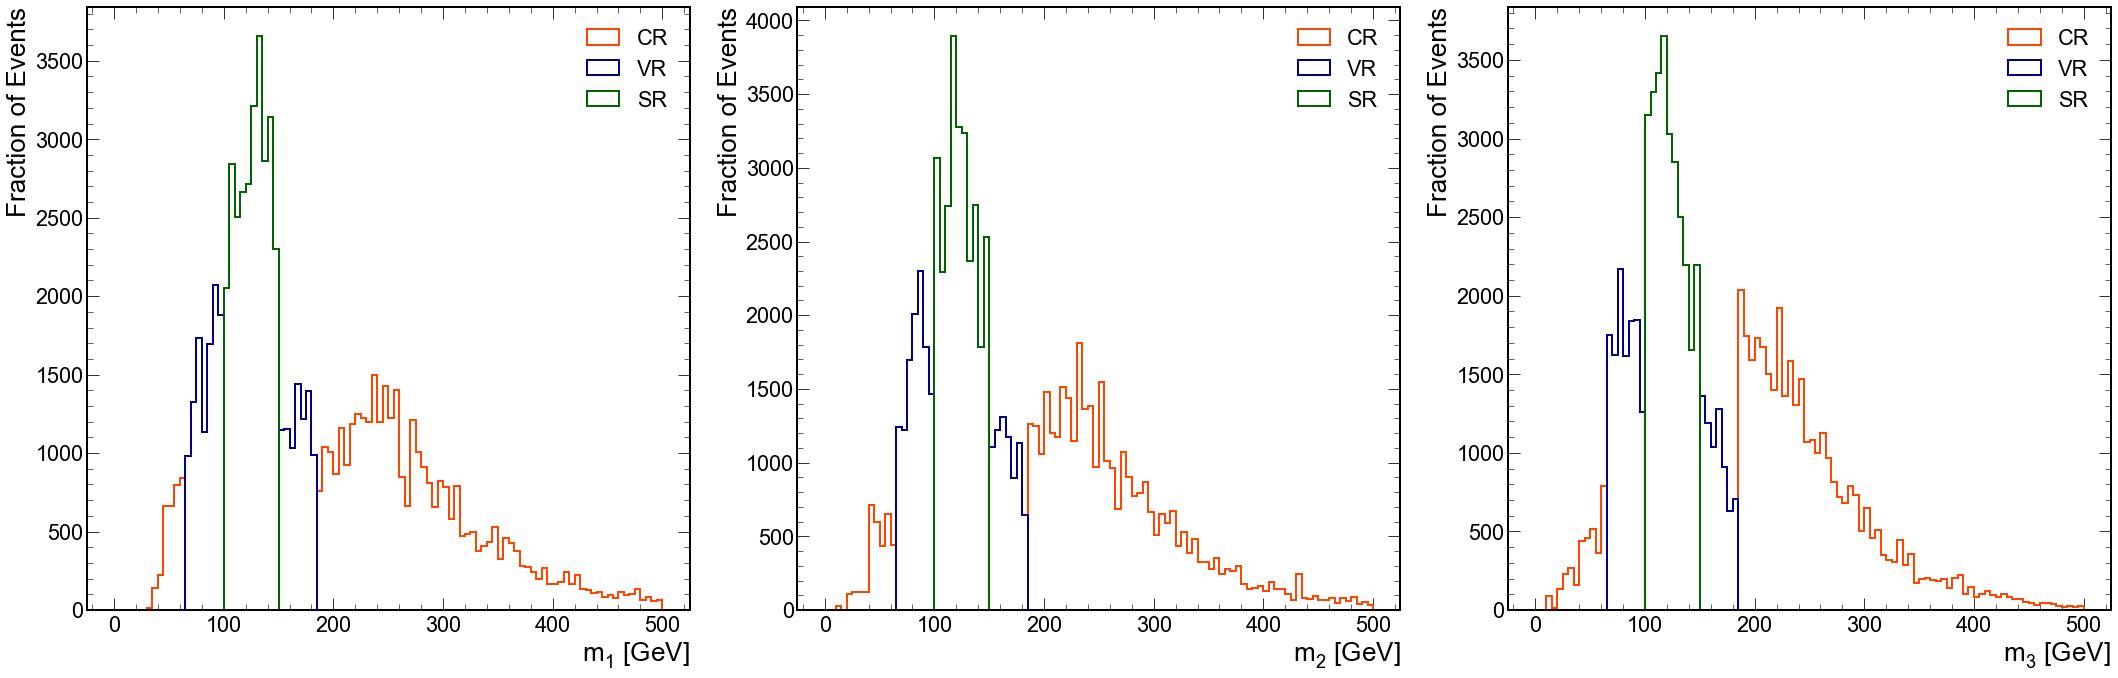

In [16]:
mH_bins = np.linspace(0,500,101)
fig, axs = plt.subplots(figsize=(30,10), nrows=1, ncols=3)

ax = axs[0]
# n_CR, b = Hist(x_bins(mH_bins), weights=N_m1, bins=mH_bins, ax=ax, color='black', label='All')
n_CR, b = Hist(x_bins(mH_bins), weights=N_m1_CR, bins=mH_bins, ax=ax, color='orangered', label='CR')
n_VR, b = Hist(x_bins(mH_bins), weights=N_m1_VR, bins=mH_bins, ax=ax, color='darkblue', label='VR')
n_VR, b = Hist(x_bins(mH_bins), weights=N_m1_SR, bins=mH_bins, ax=ax, color='C0', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Fraction of Events')
# print(n_s.sum()/np.sqrt(n_b.sum()))

ax = axs[1]
n_CR, b = Hist(x_bins(mH_bins), weights=N_m2_CR, bins=mH_bins, ax=ax, color='orangered', label='CR')
n_VR, b = Hist(x_bins(mH_bins), weights=N_m2_VR, bins=mH_bins, ax=ax, color='darkblue', label='VR')
n_VR, b = Hist(x_bins(mH_bins), weights=N_m2_SR, bins=mH_bins, ax=ax, color='C0', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax = axs[2]
n_CR, b = Hist(x_bins(mH_bins), weights=N_m3_CR, bins=mH_bins, ax=ax, color='orangered', label='CR')
n_VR, b = Hist(x_bins(mH_bins), weights=N_m3_VR, bins=mH_bins, ax=ax, color='darkblue', label='VR')
n_VR, b = Hist(x_bins(mH_bins), weights=N_m3_SR, bins=mH_bins, ax=ax, color='C0', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f'))
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Fraction of Events')

plt.tight_layout()

# fig.savefig(f'plots/dat_mH_CRVR.pdf')

In [17]:
# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)

# mass veto
dat_SR = ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR
dat_VR = ak.all(dat_Dm_cand > SR_edge, axis=1) & ak.all(dat_Dm_cand <= VR_edge, axis=1) # VR
dat_CR = ak.all(dat_Dm_cand > VR_edge, axis=1) # CR

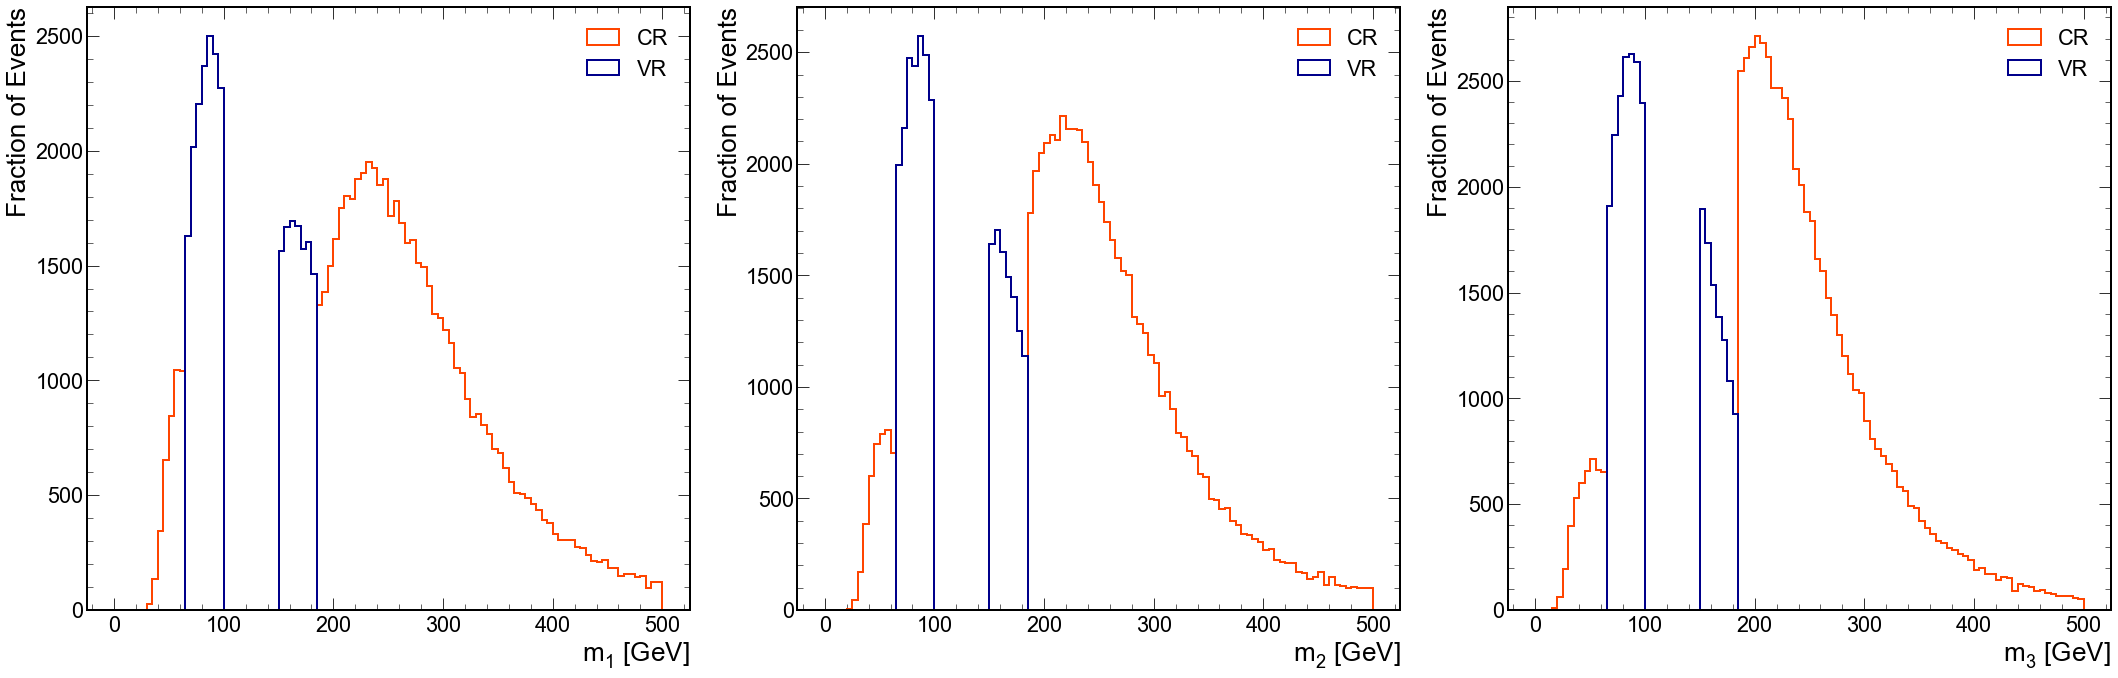

In [18]:
mH_bins = np.linspace(0,500,101)
fig, axs = plt.subplots(figsize=(30,10), nrows=1, ncols=3)

ax = axs[0]
n_CR, b = Hist(datTree.t6_higgs_m[:,0][dat_CR], bins=mH_bins, ax=ax, color='orangered', label='CR')
n_VR, b = Hist(datTree.t6_higgs_m[:,0][dat_VR], bins=mH_bins, ax=ax, color='darkblue', label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Fraction of Events')
# print(n_s.sum()/np.sqrt(n_b.sum()))

ax = axs[1]
n_CR, b = Hist(datTree.t6_higgs_m[:,1][dat_CR], bins=mH_bins, ax=ax,color='orangered', label='CR')
n_VR, b = Hist(datTree.t6_higgs_m[:,1][dat_VR], bins=mH_bins, ax=ax,color='darkblue', label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax = axs[2]
n_s, b = Hist(datTree.t6_higgs_m[:,2][dat_CR], bins=mH_bins, ax=ax, color='orangered', label='CR')
n_s, b = Hist(datTree.t6_higgs_m[:,2][dat_VR], bins=mH_bins, ax=ax, color='darkblue', label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f'))
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Fraction of Events')

plt.tight_layout()

# fig.savefig(f'plots/dat_mH_CRVR.pdf')

In [19]:
from matplotlib.gridspec import GridSpec

/tmp/ipykernel_7089/876441679.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


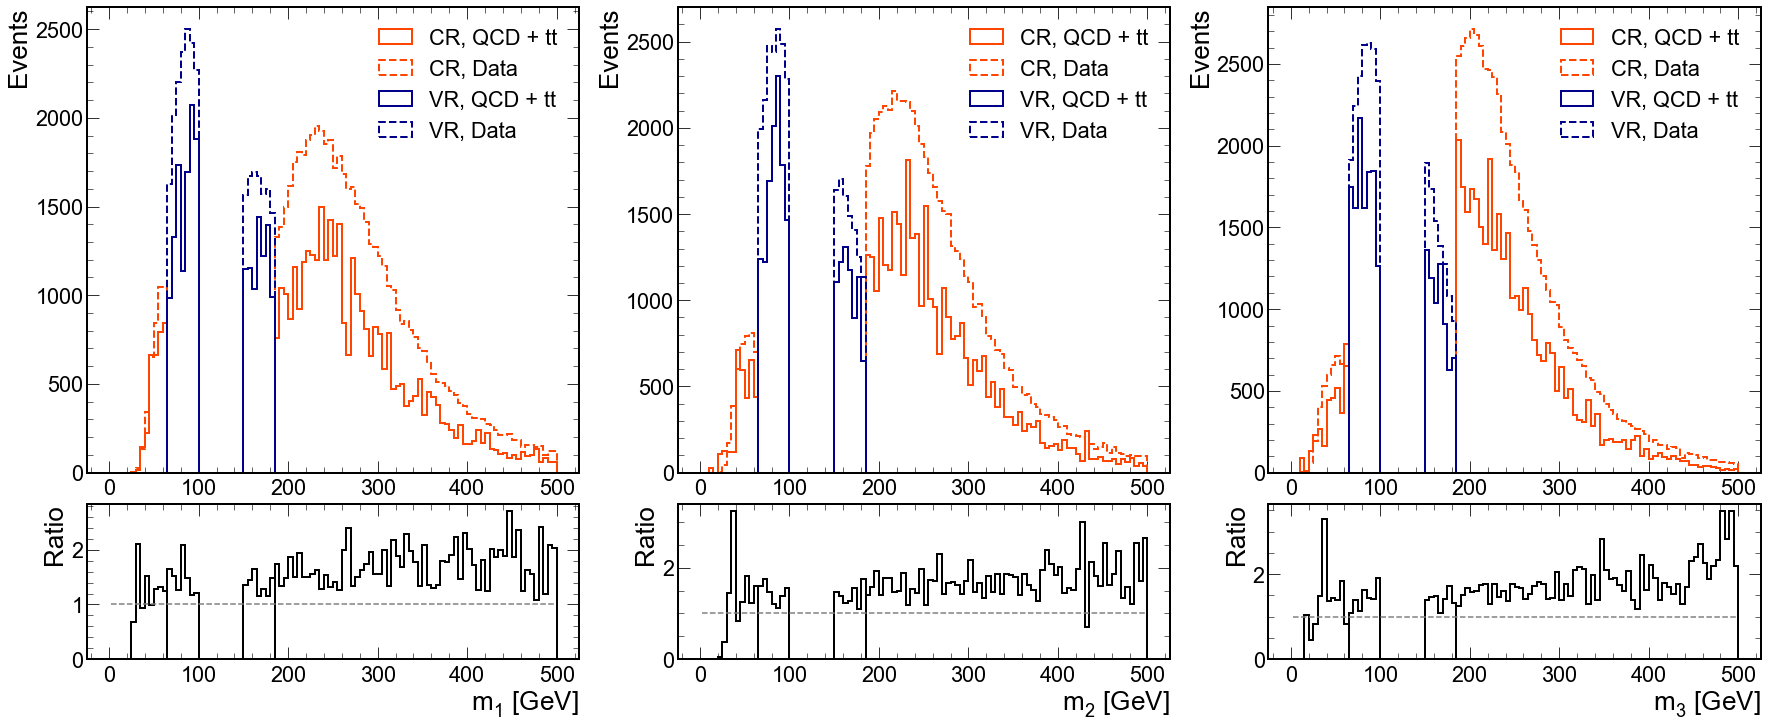

In [20]:
mH_bins = np.linspace(0,500,101)
fig = plt.figure(figsize=(30,12))
gs = GridSpec(nrows=2, ncols=3, height_ratios=[3,1], hspace=0.1)

# fig, axs = plt.subplots(figsize=(30,13), nrows=2, ncols=3)

# ax = axs[0]
ax = fig.add_subplot(gs[0,0])
# n_CR, b = Hist(x_bins(mH_bins), weights=N_m1, bins=mH_bins, ax=ax, color='black', label='All')
n_MC_CR, b = Hist(x_bins(mH_bins), weights=N_m1_CR, bins=mH_bins, ax=ax, color='orangered', label='CR, QCD + tt')
n_dat_CR, b = Hist(datTree.t6_higgs_m[:,0][dat_CR], bins=mH_bins, ax=ax, color='orangered', linestyle='--', label='CR, Data')
n_MC_VR, b = Hist(x_bins(mH_bins), weights=N_m1_VR, bins=mH_bins, ax=ax, color='darkblue', label='VR, QCD + tt')
n_dat_VR, b = Hist(datTree.t6_higgs_m[:,0][dat_VR], bins=mH_bins, ax=ax, color='darkblue', linestyle='--', label='VR, Data')
# n_VR, b = Hist(x_bins(mH_bins), weights=N_m1_SR, bins=mH_bins, ax=ax, color='C0', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylabel('Events')
# print(n_s.sum()/np.sqrt(n_b.sum()))
ax = fig.add_subplot(gs[1,0])
CR_ratio = np.where(n_MC_CR != 0, n_dat_CR/n_MC_CR, 0)
VR_ratio = np.where(n_MC_VR != 0, n_dat_VR/n_MC_VR, 0)
n,e = Hist(x_bins(mH_bins), bins=mH_bins, weights=CR_ratio, color='black', ax=ax)
n,e = Hist(x_bins(mH_bins), bins=mH_bins, weights=VR_ratio, color='black', ax=ax)
ax.plot(x_bins(mH_bins), np.ones_like(n), color='gray', linestyle='--')
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')

# ax = axs[1]
ax = fig.add_subplot(gs[0,1])
n_MC_CR, b = Hist(x_bins(mH_bins), weights=N_m2_CR, bins=mH_bins, ax=ax, color='orangered', label='CR, QCD + tt')
n_dat_CR, b = Hist(datTree.t6_higgs_m[:,1][dat_CR], bins=mH_bins, ax=ax, color='orangered', linestyle='--', label='CR, Data')
n_MC_VR, b = Hist(x_bins(mH_bins), weights=N_m2_VR, bins=mH_bins, ax=ax, color='darkblue', label='VR, QCD + tt')
n_dat_VR, b = Hist(datTree.t6_higgs_m[:,1][dat_VR], bins=mH_bins, ax=ax, color='darkblue', linestyle='--', label='VR, Data')
# n_VR, b = Hist(x_bins(mH_bins), weights=N_m2_SR, bins=mH_bins, ax=ax, color='C0', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylabel('Events')

ax = fig.add_subplot(gs[1,1])
CR_ratio = np.where(n_MC_CR != 0, n_dat_CR/n_MC_CR, 0)
VR_ratio = np.where(n_MC_VR != 0, n_dat_VR/n_MC_VR, 0)
n,e = Hist(x_bins(mH_bins), bins=mH_bins, weights=CR_ratio, color='black', ax=ax)
n,e = Hist(x_bins(mH_bins), bins=mH_bins, weights=VR_ratio, color='black', ax=ax)
ax.plot(x_bins(mH_bins), np.ones_like(n), color='gray', linestyle='--')
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')

# ax = axs[2]
ax = fig.add_subplot(gs[0,2])
n_MC_CR, b = Hist(x_bins(mH_bins), weights=N_m3_CR, bins=mH_bins, ax=ax, color='orangered', label='CR, QCD + tt')
n_dat_CR, b = Hist(datTree.t6_higgs_m[:,2][dat_CR], bins=mH_bins, ax=ax, color='orangered', linestyle='--', label='CR, Data')
n_MC_VR, b = Hist(x_bins(mH_bins), weights=N_m3_VR, bins=mH_bins, ax=ax, color='darkblue', label='VR, QCD + tt')
n_dat_VR, b = Hist(datTree.t6_higgs_m[:,2][dat_VR], bins=mH_bins, ax=ax, color='darkblue', linestyle='--', label='VR, Data')
# n_VR, b = Hist(x_bins(mH_bins), weights=N_m3_SR, bins=mH_bins, ax=ax, color='C0', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f'))
ax.set_ylabel('Events')

ax = fig.add_subplot(gs[1,2])
CR_ratio = np.where(n_MC_CR != 0, n_dat_CR/n_MC_CR, 0)
VR_ratio = np.where(n_MC_VR != 0, n_dat_VR/n_MC_VR, 0)
n,e = Hist(x_bins(mH_bins), bins=mH_bins, weights=CR_ratio, color='black', ax=ax)
n,e = Hist(x_bins(mH_bins), bins=mH_bins, weights=VR_ratio, color='black', ax=ax)
ax.plot(x_bins(mH_bins), np.ones_like(n), color='gray', linestyle='--')
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')

plt.tight_layout()

fig.savefig(f'plots/MC_v_dat_mH_CRVR.pdf')

In [21]:
ptBins = np.linspace(0,400,100)

/tmp/ipykernel_7089/1237360974.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


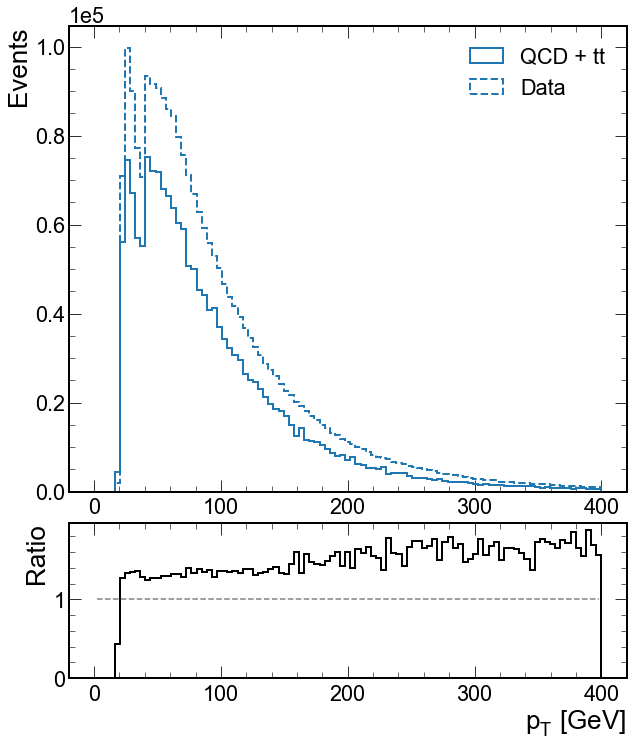

In [22]:
n,b,x = get_scaled_weights(MCTree.t6_jet_pt, ptBins, MCTree.scale)

fig = plt.figure(figsize=(10,12))
gs = GridSpec(nrows=2, ncols=1, height_ratios=[3,1], hspace=0.1)

# fig, axs = plt.subplots(figsize=(30,13), nrows=2, ncols=3)

# ax = axs[0]
ax = fig.add_subplot(gs[0])
# n_CR, b = Hist(x_bins(mH_bins), weights=N_m1, bins=mH_bins, ax=ax, color='black', label='All')
n_MC, b = Hist(x_bins(ptBins), weights=n, bins=ptBins, ax=ax, color='C0', label='QCD + tt')
n_dat, b = Hist(datTree.t6_jet_pt, bins=ptBins, ax=ax, color='C0', linestyle='--', label='Data')
# n_VR, b = Hist(x_bins(mH_bins), weights=N_m1_SR, bins=mH_bins, ax=ax, color='C0', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylabel('Events')
# print(n_s.sum()/np.sqrt(n_b.sum()))
ax = fig.add_subplot(gs[1])
ratio = np.where(n_MC != 0, n_dat/n_MC, 0)
n,e = Hist(x_bins(ptBins), bins=ptBins, weights=ratio, color='black', ax=ax)
ax.plot(x_bins(ptBins), np.ones_like(ptBins[:-1]), color='gray', linestyle='--')
ax.set_xlabel(r'$p_T$ [GeV]')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')

plt.tight_layout()

fig.savefig(f'plots/MC_v_dat_t6_pt.pdf')

In [23]:
N_pt1 = np.zeros_like(ptBins[:-1])
N_pt2 = np.zeros_like(ptBins[:-1])
N_pt3 = np.zeros_like(ptBins[:-1])
N_pt4 = np.zeros_like(ptBins[:-1])
N_pt5 = np.zeros_like(ptBins[:-1])
N_pt6 = np.zeros_like(ptBins[:-1])

for arr,scale in zip(MCTree.t6_jet_pt, MCTree.scale):
    n,e = np.histogram(arr[:,0].to_numpy(), bins=ptBins)
    N_pt1 += n*scale
    n,e = np.histogram(arr[:,1].to_numpy(), bins=ptBins)
    N_pt2 += n*scale
    n,e = np.histogram(arr[:,2].to_numpy(), bins=ptBins)
    N_pt3 += n*scale
    n,e = np.histogram(arr[:,3].to_numpy(), bins=ptBins)
    N_pt4 += n*scale
    n,e = np.histogram(arr[:,4].to_numpy(), bins=ptBins)
    N_pt5 += n*scale
    n,e = np.histogram(arr[:,5].to_numpy(), bins=ptBins)
    N_pt6 += n*scale

In [24]:
N_QCD_pt1 = np.zeros_like(ptBins[:-1])
N_QCD_pt2 = np.zeros_like(ptBins[:-1])
N_QCD_pt3 = np.zeros_like(ptBins[:-1])
N_QCD_pt4 = np.zeros_like(ptBins[:-1])
N_QCD_pt5 = np.zeros_like(ptBins[:-1])
N_QCD_pt6 = np.zeros_like(ptBins[:-1])

for arr,scale in zip(QCDTree.t6_jet_pt, QCDTree.scale):
    n,e = np.histogram(arr[:,0].to_numpy(), bins=ptBins)
    N_QCD_pt1 += n*scale
    n,e = np.histogram(arr[:,1].to_numpy(), bins=ptBins)
    N_QCD_pt2 += n*scale
    n,e = np.histogram(arr[:,2].to_numpy(), bins=ptBins)
    N_QCD_pt3 += n*scale
    n,e = np.histogram(arr[:,3].to_numpy(), bins=ptBins)
    N_QCD_pt4 += n*scale
    n,e = np.histogram(arr[:,4].to_numpy(), bins=ptBins)
    N_QCD_pt5 += n*scale
    n,e = np.histogram(arr[:,5].to_numpy(), bins=ptBins)
    N_QCD_pt6 += n*scale

In [35]:
print(N_pt1.sum())
print(N_pt2.sum())
print(N_pt3.sum())
print(N_pt4.sum())
print(N_pt5.sum())
print(N_pt6.sum())

284356.8092847871
290054.82670663926
288500.51283185877
289423.9219002662
287423.3409085472
288546.21349339205


/tmp/ipykernel_7089/2773094879.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


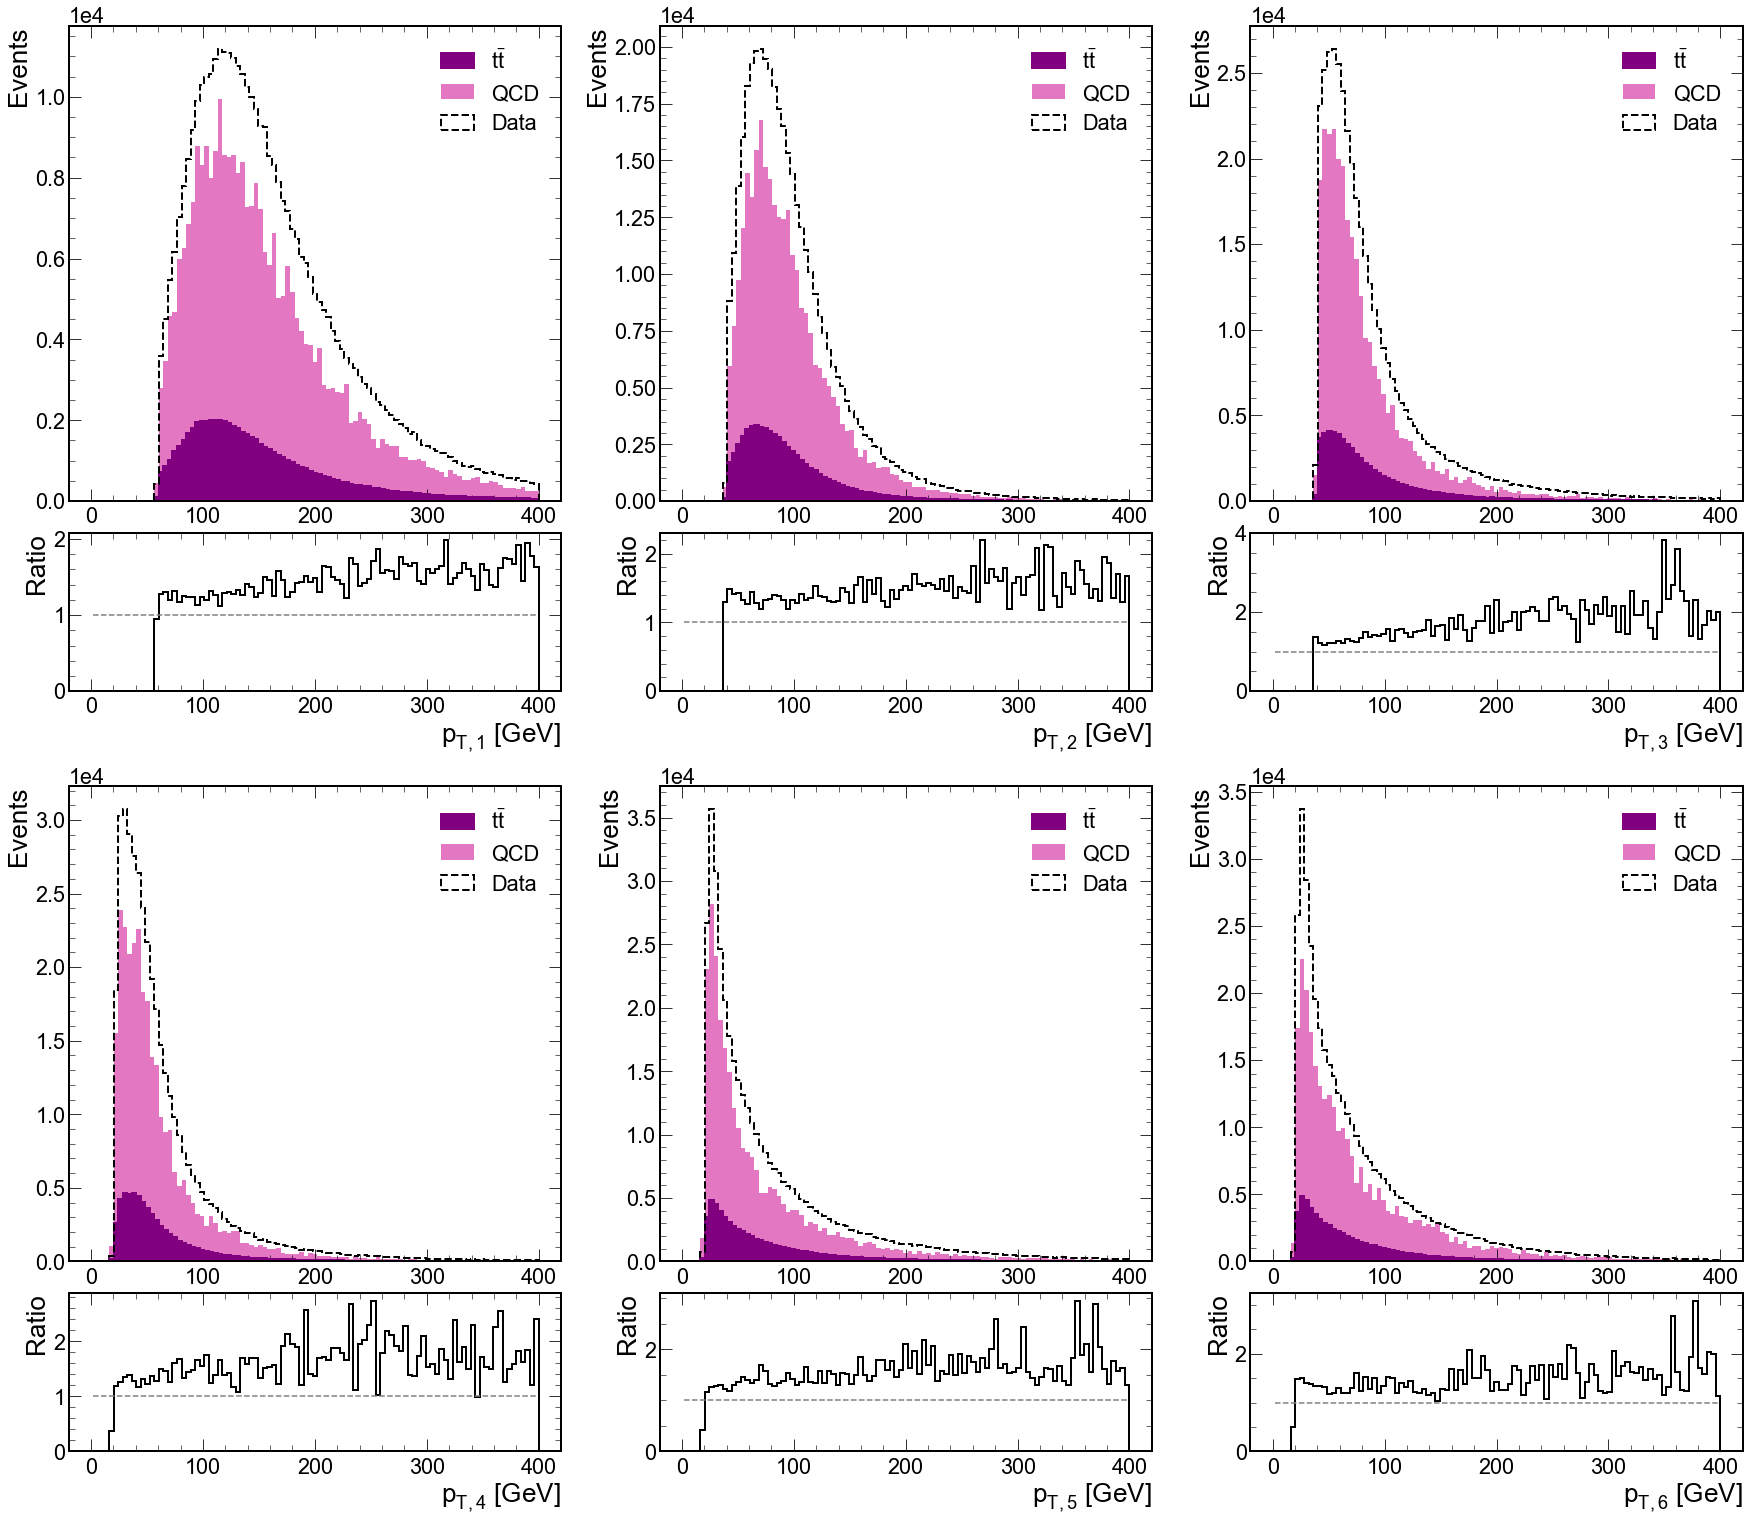

In [31]:
QCD_color = 'tab:pink'
TT_color = 'tab:cyan'

n,b,x = get_scaled_weights(MCTree.t6_jet_pt, ptBins, MCTree.scale)

fig = plt.figure(figsize=(30,22))
gs = GridSpec(nrows=2, ncols=3, height_ratios=[3,1], hspace=0.1, bottom=0.53, top=0.95)

# fig, axs = plt.subplots(figsize=(30,13), nrows=2, ncols=3)

# ax = axs[0]
ax = fig.add_subplot(gs[0,0])
# n_MC, b = Hist(x_bins(ptBins), weights=N_pt1, bins=ptBins, ax=ax, color='C0', label='QCD + tt')
n_MC = N_pt1
n_TT, b = Hist(TTTree.t6_jet_pt[:,0], bins=ptBins, ax=ax, color='purple', label=r'$t\bar{t}$', scale=TTTree.scale, fill=True)
n_QCD, b = Hist(x_bins(ptBins), weights=N_QCD_pt1, bins=ptBins, ax=ax, label='QCD', color=QCD_color, bottom=n_TT, histtype='bar')
# n_dat, b = Hist(datTree.t6_jet_pt[:,0], bins=ptBins, ax=ax, color='black', linestyle='--', label='Data')
n_dat, b = np.histogram(datTree.t6_jet_pt[:,0], bins=ptBins)
ax.
ax.set_ylabel('Events')

ax = fig.add_subplot(gs[1,0])
ratio = np.where(n_MC != 0, n_dat/n_MC, 0)
n,e = Hist(x_bins(ptBins), bins=ptBins, weights=ratio, color='black', ax=ax)
ax.plot(x_bins(ptBins), np.ones_like(ptBins[:-1]), color='gray', linestyle='--')
ax.set_xlabel(r'$p_{T,1}$ [GeV]')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')

ax = fig.add_subplot(gs[0,1])
n_MC = N_pt2
n_TT, b = Hist(TTTree.t6_jet_pt[:,1], bins=ptBins, ax=ax, color='purple', label=r'$t\bar{t}$', scale=TTTree.scale, fill=True,)
n_QCD, b = Hist(x_bins(ptBins), weights=N_QCD_pt2, bins=ptBins, ax=ax, color=QCD_color, label='QCD', histtype='bar', bottom=n_TT)
n_dat, b = Hist(datTree.t6_jet_pt[:,1], bins=ptBins, ax=ax, color='black', linestyle='--', label='Data')
ax.set_ylabel('Events')

ax = fig.add_subplot(gs[1,1])
ratio = np.where(n_MC != 0, n_dat/n_MC, 0)
n,e = Hist(x_bins(ptBins), bins=ptBins, weights=ratio, color='black', ax=ax)
ax.plot(x_bins(ptBins), np.ones_like(ptBins[:-1]), color='gray', linestyle='--')
ax.set_xlabel(r'$p_{T,2}$ [GeV]')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')

ax = fig.add_subplot(gs[0,2])
n_MC = N_pt3
n_TT, b = Hist(TTTree.t6_jet_pt[:,2], bins=ptBins, ax=ax, color='purple', label=r'$t\bar{t}$', scale=TTTree.scale, fill=True)
n_QCD, b = Hist(x_bins(ptBins), weights=N_QCD_pt3, bins=ptBins, ax=ax, color=QCD_color, label='QCD', histtype='bar', bottom=n_TT)
n_dat, b = Hist(datTree.t6_jet_pt[:,2], bins=ptBins, ax=ax, color='black', linestyle='--', label='Data')
ax.set_ylabel('Events')

ax = fig.add_subplot(gs[1,2])
ratio = np.where(n_MC != 0, n_dat/n_MC, 0)
n,e = Hist(x_bins(ptBins), bins=ptBins, weights=ratio, color='black', ax=ax)
ax.plot(x_bins(ptBins), np.ones_like(ptBins[:-1]), color='gray', linestyle='--')
ax.set_xlabel(r'$p_{T,3}$ [GeV]')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')

gs = GridSpec(nrows=2, ncols=3, height_ratios=[3,1], hspace=0.1, bottom=0.05, top=0.47)

ax = fig.add_subplot(gs[0,0])
n_MC = N_pt4
n_TT, b = Hist(TTTree.t6_jet_pt[:,3], bins=ptBins, ax=ax, color='purple', label=r'$t\bar{t}$', scale=TTTree.scale, fill=True)
n_QCD, b = Hist(x_bins(ptBins), weights=N_QCD_pt4, bins=ptBins, ax=ax, color=QCD_color, label='QCD', bottom=n_TT, histtype='bar')
n_dat, b = Hist(datTree.t6_jet_pt[:,3], bins=ptBins, ax=ax, color='black', linestyle='--', label='Data')
ax.set_ylabel('Events')

ax = fig.add_subplot(gs[1,0])
ratio = np.where(n_MC != 0, n_dat/n_MC, 0)
n,e = Hist(x_bins(ptBins), bins=ptBins, weights=ratio, color='black', ax=ax)
ax.plot(x_bins(ptBins), np.ones_like(ptBins[:-1]), color='gray', linestyle='--')
ax.set_xlabel(r'$p_{T,4}$ [GeV]')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')

ax = fig.add_subplot(gs[0,1])
n_MC = N_pt5
n_TT, b = Hist(TTTree.t6_jet_pt[:,4], bins=ptBins, ax=ax, color='purple', label=r'$t\bar{t}$', scale=TTTree.scale, fill=True)
n_QCD, b = Hist(x_bins(ptBins), weights=N_QCD_pt5, bins=ptBins, ax=ax, color=QCD_color, label='QCD', bottom=n_TT, histtype='bar')
n_dat, b = Hist(datTree.t6_jet_pt[:,4], bins=ptBins, ax=ax, color='black', linestyle='--', label='Data')
ax.set_ylabel('Events')

ax = fig.add_subplot(gs[1,1])
ratio = np.where(n_MC != 0, n_dat/n_MC, 0)
n,e = Hist(x_bins(ptBins), bins=ptBins, weights=ratio, color='black', ax=ax)
ax.plot(x_bins(ptBins), np.ones_like(ptBins[:-1]), color='gray', linestyle='--')
ax.set_xlabel(r'$p_{T,5}$ [GeV]')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')

ax = fig.add_subplot(gs[0,2])
n_MC = N_pt6
n_TT, b = Hist(TTTree.t6_jet_pt[:,5], bins=ptBins, ax=ax, color='purple', label=r'$t\bar{t}$', scale=TTTree.scale, fill=True)
n_QCD, b = Hist(x_bins(ptBins), weights=N_QCD_pt6, bins=ptBins, ax=ax, color=QCD_color, label='QCD', bottom=n_TT, histtype='bar')
n_dat, b = Hist(datTree.t6_jet_pt[:,5], bins=ptBins, ax=ax, color='black', linestyle='--', label='Data')
ax.set_ylabel('Events')

ax = fig.add_subplot(gs[1,2])
ratio = np.where(n_MC != 0, n_dat/n_MC, 0)
n,e = Hist(x_bins(ptBins), bins=ptBins, weights=ratio, color='black', ax=ax)
ax.plot(x_bins(ptBins), np.ones_like(ptBins[:-1]), color='gray', linestyle='--')
ax.set_xlabel(r'$p_{T,6}$ [GeV]')
ax.set_ylabel(r'$N_\mathrm{hs}/N_\mathrm{ls}$')

plt.tight_layout()

fig.savefig(f'plots/MC_v_dat_t6_pt_sixb.pdf')